In [13]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd


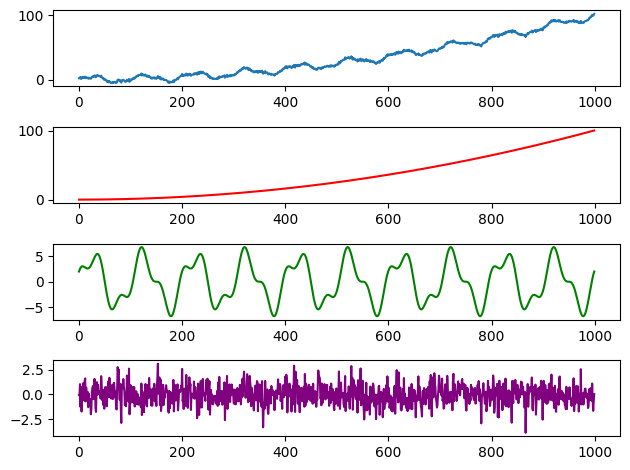

In [2]:
#1 
N = 1000
np.random.seed(21)
t = np.linspace(0, N, N)
trend =  t ** 2  * 1e-4
season = 5 * np.sin(0.02 * np.pi * t) + 2 * np.cos(0.05 * np.pi * t)
noise = np.random.normal(0, 1, N)
ts =  trend + season + noise

fig, axs = plt.subplots(4)
axs[0].plot(ts)
axs[1].plot(trend, color='red')
axs[2].plot(season, color = 'green')
axs[3].plot(noise, color = 'purple')
plt.tight_layout()
plt.show()

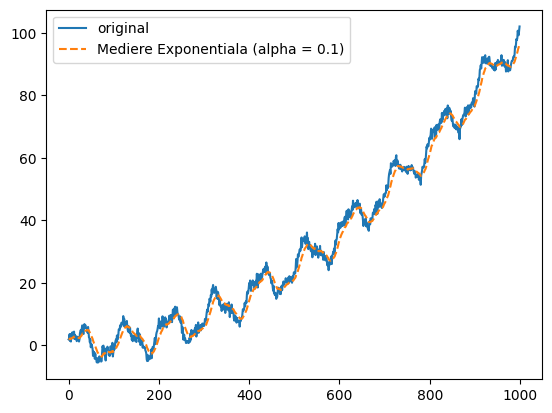

In [3]:
#2 
def mediere_exp(ts, alpha):
    ts_med = np.zeros(len(ts))
    ts_med[0] = ts[0]
    for i in range(1, len(ts)):
        ts_med[i] = alpha * ts[i] + (1 - alpha) * ts_med[i - 1]
    return ts_med

ts_med = mediere_exp(ts, 0.1)
plt.plot(ts, label='original')
plt.plot(ts_med, label='Mediere Exponentiala (alpha = 0.1)', linestyle="--")
plt.legend()
plt.show()

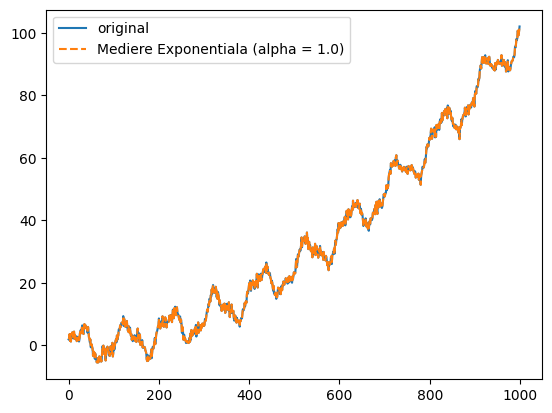

In [4]:
alphas = np.linspace(0, 1, 1000)
mse = []

for alpha in alphas:
    ts_med = mediere_exp(ts, alpha)
    mse.append(np.mean((ts - ts_med) ** 2))

best_alpha = alphas[np.argmin(mse)]
best_mediere = mediere_exp(ts, best_alpha)
plt.plot(ts, label='original')
plt.plot(best_mediere, label=f'Mediere Exponentiala (alpha = {best_alpha})', linestyle="--")
plt.legend()
plt.show()


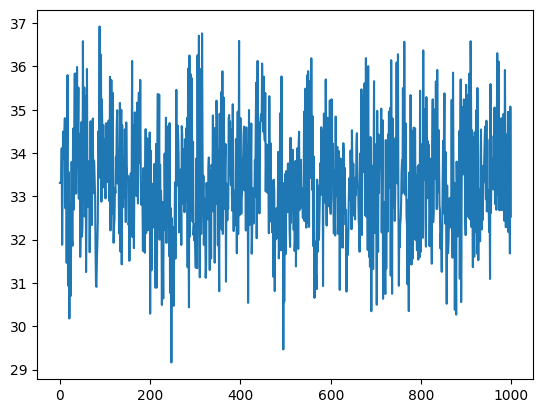

In [5]:
#3
q = 3
err = np.random.normal(0, 1, N)
theta = 0.8

ma_series = np.full(N, np.mean(ts))
for i in range(q,N):
    ma_series[i] += theta * err[i - q] + err[i]

plt.plot(ma_series)
plt.show()


In [ ]:
import itertools
import statsmodels.api as sm
import concurrent.futures
best_aic = float("inf")
best_pq = (None, None)
best_model = None

p = range(0, 20)
q = range(0, 20)
pq_combinations = list(itertools.product(p, q))

def evaluate_arima_model(ts, combination):
    try:
        model = sm.tsa.ARIMA(ts, order=(combination[0], 0, combination[1])).fit()
        return (model.aic, combination)
    except:
        return (float("inf"), combination)

def update_best_model(result):
    global best_aic, best_pq, best_model
    aic, pq = result
    if aic < best_aic:
        best_aic = aic
        best_pq = pq
        best_model = sm.tsa.ARIMA(ts, order=(pq[0], 0, pq[1])).fit()

def evaluate_and_update_model(combination):
    result = evaluate_arima_model(ts, combination)
    update_best_model(result)

with concurrent.futures.ThreadPoolExecutor() as executor:
    futures = [executor.submit(evaluate_and_update_model, combination) for combination in pq_combinations]

    concurrent.futures.wait(futures)

print(f"The best model has AIC: {best_aic} with p,q: {best_pq}")




In [22]:
# The best model has AIC: 20.0 with p,q: (4, 4)
best_p, best_q = best_pq
model_optim = sm.tsa.ARIMA(ts, order=(best_p, 0, best_q)).fit()

c:\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [23]:
in_sample_prediction = model_optim.predict(start=0, end=len(ts)-1)

model_optim.forecast(10)


array([31.81443529, 31.81443529, 31.81443529, 31.81443529, 31.81443529,
       31.81443529, 31.81443529, 31.81443529, 31.81443529, 31.81443529])